In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
file_path = 'WaterQuality/imputed_data.csv'
df = pd.read_csv(file_path)
import warnings

warnings.filterwarnings('ignore')
sns.set_style()

## Normallik, Çarpıklık ,Basıklık

### Shapiro-wilks

In [4]:
from scipy import stats

numeric_columns = df.drop(columns=['Potability'])

for column in numeric_columns.columns:
    data = pd.to_numeric(df[column], errors='coerce').dropna()
    stat, p_value = stats.shapiro(data)
    
    print(f'{column} için Shapiro-Wilk testi:')
    print(f'  Test istatistiği: {stat}')
    print(f'  p-değeri: {p_value}\n')

    if p_value < 0.05:
        print(f'{column} verisi normal dağılmıyor.\n')
    else:
        print(f'{column} verisi normal dağılıyor.\n')


ph için Shapiro-Wilk testi:
  Test istatistiği: 0.9833799004554749
  p-değeri: 3.5498898012353016e-19

ph verisi normal dağılmıyor.

Hardness için Shapiro-Wilk testi:
  Test istatistiği: 0.9959684014320374
  p-değeri: 9.584165638898412e-08

Hardness verisi normal dağılmıyor.

Solids için Shapiro-Wilk testi:
  Test istatistiği: 0.9777269959449768
  p-değeri: 2.955943348526295e-22

Solids verisi normal dağılmıyor.

Chloramines için Shapiro-Wilk testi:
  Test istatistiği: 0.996772050857544
  p-değeri: 1.8123619156540371e-06

Chloramines verisi normal dağılmıyor.

Sulfate için Shapiro-Wilk testi:
  Test istatistiği: 0.9752057194709778
  p-değeri: 1.9095329577126287e-23

Sulfate verisi normal dağılmıyor.

Conductivity için Shapiro-Wilk testi:
  Test istatistiği: 0.9929697513580322
  p-değeri: 1.5015037824195332e-11

Conductivity verisi normal dağılmıyor.

Organic_carbon için Shapiro-Wilk testi:
  Test istatistiği: 0.9995209574699402
  p-değeri: 0.6202165484428406

Organic_carbon verisi norm

### Çarpıklık ve Basıklık

In [6]:
import pandas as pd

numeric_columns = df.drop(columns=['Potability'])

for column in numeric_columns.columns:
    skewness = numeric_columns[column].skew()  # Çarpıklık
    kurtosis = numeric_columns[column].kurt()  # Basıklık
    
    if skewness > 2:
        skewness_level = 'Şiddetli sağa çarpık'
    elif skewness > 1:
        skewness_level = 'Orta derecede sağa çarpık'
    elif skewness > 0.5:
        skewness_level = 'Hafif sağa çarpık'
    elif skewness > -0.5:
        skewness_level = 'Simetrik'
    elif skewness > -1:
        skewness_level = 'Hafif sola çarpık'
    elif skewness > -2:
        skewness_level = 'Orta derecede sola çarpık'
    else:
        skewness_level = 'Şiddetli sola çarpık'
    
    if kurtosis > 6:
        kurtosis_level = 'Aşırı leptokurtik (çok belirgin uç noktalar)'
    elif kurtosis > 3:
        kurtosis_level = 'Leptokurtik (keskin dağılım)'
    elif kurtosis > 0:
        kurtosis_level = 'Normal dağılıma yakın'
    elif kurtosis > -1:
        kurtosis_level = 'Daha düz, platykurtik'
    else:
        kurtosis_level = 'Aşırı düz'
    

    print(f'{column} için Çarpıklık (Skewness): {skewness} - {skewness_level}')
    print(f'{column} için Basıklık (Kurtosis): {kurtosis} - {kurtosis_level}\n')

ph için Çarpıklık (Skewness): 0.028895424197715625 - Simetrik
ph için Basıklık (Kurtosis): 1.3570534064667168 - Normal dağılıma yakın

Hardness için Çarpıklık (Skewness): -0.039341704776724926 - Simetrik
Hardness için Basıklık (Kurtosis): 0.6157716821342123 - Normal dağılıma yakın

Solids için Çarpıklık (Skewness): 0.6216344855169127 - Hafif sağa çarpık
Solids için Basıklık (Kurtosis): 0.4428260857797124 - Normal dağılıma yakın

Chloramines için Çarpıklık (Skewness): -0.0120984401243822 - Simetrik
Chloramines için Basıklık (Kurtosis): 0.5899011685623812 - Normal dağılıma yakın

Sulfate için Çarpıklık (Skewness): -0.04320947518631364 - Simetrik
Sulfate için Basıklık (Kurtosis): 1.66539550042872 - Normal dağılıma yakın

Conductivity için Çarpıklık (Skewness): 0.2644902239264119 - Simetrik
Conductivity için Basıklık (Kurtosis): -0.2770928328764719 - Daha düz, platykurtik

Organic_carbon için Çarpıklık (Skewness): 0.025532582090242513 - Simetrik
Organic_carbon için Basıklık (Kurtosis): 0.0

## Levene Testi

In [8]:
import pandas as pd
import scipy.stats as stats

group_0 = df[df['Potability'] == 0][['ph', 'Hardness', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
group_1 = df[df['Potability'] == 1][['ph', 'Hardness', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]

for column in group_0.columns:
    stat, p_value = stats.levene(group_0[column], group_1[column])
    print(f"Levene Testi Sonucu ({column}):")
    print(f"Test İstatistiği: {stat}, p-değeri: {p_value}")
    if p_value < 0.05:
        print("Varyanslar eşit değil (istatistiksel olarak anlamlı).")
    else:
        print("Varyanslar eşit (istatistiksel olarak anlamlı değil).")
    print()


Levene Testi Sonucu (ph):
Test İstatistiği: 19.005954660688644, p-değeri: 1.3432236303778868e-05
Varyanslar eşit değil (istatistiksel olarak anlamlı).

Levene Testi Sonucu (Hardness):
Test İstatistiği: 21.69949522340351, p-değeri: 3.315717610042509e-06
Varyanslar eşit değil (istatistiksel olarak anlamlı).

Levene Testi Sonucu (Chloramines):
Test İstatistiği: 18.96122724135035, p-değeri: 1.3748964443090451e-05
Varyanslar eşit değil (istatistiksel olarak anlamlı).

Levene Testi Sonucu (Sulfate):
Test İstatistiği: 67.30697671671555, p-değeri: 3.3018067243394355e-16
Varyanslar eşit değil (istatistiksel olarak anlamlı).

Levene Testi Sonucu (Conductivity):
Test İstatistiği: 2.095557750230969, p-değeri: 0.14782353722177793
Varyanslar eşit (istatistiksel olarak anlamlı değil).

Levene Testi Sonucu (Organic_carbon):
Test İstatistiği: 0.8274019824424551, p-değeri: 0.3630918070551923
Varyanslar eşit (istatistiksel olarak anlamlı değil).

Levene Testi Sonucu (Trihalomethanes):
Test İstatistiği: 0

- Her bir grupta (0 ve 1) bu özelliklerin (ph, Hardness, Chloramines, Sulfate) çeşitli şekillerde dağıldığını gösterir. Yani, bu değişkenlerin potabilite 0 ve 1 olan gruplar arasında çok daha farklı seviyelere sahip olabilir

Örneğin:

pH değeri: Potabilite 0 olan grupta pH değeri 5 ile 7 arasında geniş bir aralıkta dağılmış olabilir. Ancak Potabilite 1 grubunda pH değeri 6 ile 6.5 arasında daha dar bir aralıkta olabilir. Yani, Potabilite 0 grubu pH konusunda daha çeşitlenmişken, Potabilite 1 grubu daha homojen bir şekilde pH değerine sahip olabilir.

Hardness (Sertlik): Potabilite 0 olan grupta suyun sertliği çok farklı seviyelerde olabilir, örneğin 50 ile 300 arasında değişebilir. Potabilite 1 grubunda ise sertlik değeri daha dar bir aralıkta, örneğin 100 ile 150 arasında olabilir.

## Mann-Whitney U

In [12]:
from scipy.stats import mannwhitneyu


numerical_columns = ['ph', 'Hardness', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


for column in numerical_columns:
   
    group_0 = df[df['Potability'] == 0][column]
    group_1 = df[df['Potability'] == 1][column]
    
 
    stat, p_value = mannwhitneyu(group_0, group_1)
   
    print(f"\nMann-Whitney U testi '{column}' için:")
    print(f"Test İstatistiği (U): {stat:.4f}")
    print(f"P-değeri: {p_value:.4f}")
    
    
    if p_value < 0.05:
        print("Gruplar arasında istatistiksel olarak anlamlı bir fark var.\n")
        print(f"Sonuç: {column} ile Potability arasında anlamlı bir ilişki bulunuyor.\n")
    else:
        print("Gruplar arasında istatistiksel olarak anlamlı bir fark yok.\n")
        print(f"Sonuç: {column} ile Potability arasında anlamlı bir ilişki bulunmuyor.\n")



Mann-Whitney U testi 'ph' için:
Test İstatistiği (U): 1283778.0000
P-değeri: 0.7893
Gruplar arasında istatistiksel olarak anlamlı bir fark yok.

Sonuç: ph ile Potability arasında anlamlı bir ilişki bulunmuyor.


Mann-Whitney U testi 'Hardness' için:
Test İstatistiği (U): 1292749.0000
P-değeri: 0.5439
Gruplar arasında istatistiksel olarak anlamlı bir fark yok.

Sonuç: Hardness ile Potability arasında anlamlı bir ilişki bulunmuyor.


Mann-Whitney U testi 'Chloramines' için:
Test İstatistiği (U): 1238973.0000
P-değeri: 0.1529
Gruplar arasında istatistiksel olarak anlamlı bir fark yok.

Sonuç: Chloramines ile Potability arasında anlamlı bir ilişki bulunmuyor.


Mann-Whitney U testi 'Sulfate' için:
Test İstatistiği (U): 1293482.0000
P-değeri: 0.5256
Gruplar arasında istatistiksel olarak anlamlı bir fark yok.

Sonuç: Sulfate ile Potability arasında anlamlı bir ilişki bulunmuyor.


Mann-Whitney U testi 'Conductivity' için:
Test İstatistiği (U): 1292417.0000
P-değeri: 0.5523
Gruplar arasında 

## Pearson Korelasyon Testi

In [23]:
from scipy.stats import pearsonr

numerical_columns = ['ph', 'Hardness', 'Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']


for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        col1 = numerical_columns[i]
        col2 = numerical_columns[j]
        
        
        corr_coefficient, p_value = pearsonr(df[col1], df[col2])
        

        print(f"\nPearson Korelasyonu '{col1}' ve '{col2}' için:")
        print(f"Korelasyon Katsayısı: {corr_coefficient:.4f}")
        print(f"P-değeri: {p_value:.4f}")
        
       
        if p_value < 0.05:
            print("Korelasyon istatistiksel olarak anlamlı.\n")
        else:
            print("Korelasyon istatistiksel olarak anlamlı değil.\n")


Pearson Korelasyonu 'ph' ve 'Hardness' için:
Korelasyon Katsayısı: 0.0861
P-değeri: 0.0000
Korelasyon istatistiksel olarak anlamlı.


Pearson Korelasyonu 'ph' ve 'Chloramines' için:
Korelasyon Katsayısı: -0.0309
P-değeri: 0.0768
Korelasyon istatistiksel olarak anlamlı değil.


Pearson Korelasyonu 'ph' ve 'Sulfate' için:
Korelasyon Katsayısı: 0.0221
P-değeri: 0.2064
Korelasyon istatistiksel olarak anlamlı değil.


Pearson Korelasyonu 'ph' ve 'Conductivity' için:
Korelasyon Katsayısı: 0.0191
P-değeri: 0.2741
Korelasyon istatistiksel olarak anlamlı değil.


Pearson Korelasyonu 'ph' ve 'Organic_carbon' için:
Korelasyon Katsayısı: 0.0383
P-değeri: 0.0285
Korelasyon istatistiksel olarak anlamlı.


Pearson Korelasyonu 'ph' ve 'Trihalomethanes' için:
Korelasyon Katsayısı: 0.0032
P-değeri: 0.8567
Korelasyon istatistiksel olarak anlamlı değil.


Pearson Korelasyonu 'ph' ve 'Turbidity' için:
Korelasyon Katsayısı: -0.0368
P-değeri: 0.0352
Korelasyon istatistiksel olarak anlamlı.


Pearson Korelas

- Zayıf İlişkiler: Çoğu değişken arasındaki korelasyon katsayıları çok düşük, genellikle 0 ile 0.1 arasında. Bu, değişkenler arasında çok zayıf bir doğrusal ilişki olduğunu gösteriyor.

- İstatistiksel Anlamlılık: P-değerlerine bakıldığında, yalnızca bazı değişken çiftleri istatistiksel olarak anlamlı (p-değeri < 0.05). Ancak, korelasyon katsayıları çok küçük olduğundan, bu ilişkilerin pratikte önemli olup olmadığına dikkat edilmelidir.
               
- 'ph' ve 'Hardness' arasında zayıf bir ilişki olabilir, ancak bu ilişkinin pratikte ne kadar önemli olduğu sorgulanmalıdır.


- 'Hardness' ve 'Sulfate' arasında anlamlı bir ilişki var, ancak bu da düşük negatif bir korelasyon olduğu için, sonuçlar anlamlı olmakla birlikte, bağlamı iyi anlamak gerekir.


Korelasyonlar zayıf ve çoğu istatistiksel olarak anlamlı değil.

Ancak bazı değişkenler arasında çok zayıf ama anlamlı korelasyonlar mevcut. Bu tür zayıf ilişkiler bazen veri analizi bağlamında faydalı olabilir, ancak fazla anlam yüklememek gerekir.

Sonuç olarak bağımsız değişkenler arasında korelasyon olması istediğimiz bir şey değil zaten 

Korelasyon Matrisi:
                       ph  Hardness  Chloramines   Sulfate  Conductivity  \
ph               1.000000  0.086052    -0.030921  0.022080      0.019115   
Hardness         0.086052  1.000000    -0.030054 -0.120626     -0.023915   
Chloramines     -0.030921 -0.030054     1.000000  0.028272     -0.020486   
Sulfate          0.022080 -0.120626     0.028272  1.000000     -0.019036   
Conductivity     0.019115 -0.023915    -0.020486 -0.019036      1.000000   
Organic_carbon   0.038279  0.003610    -0.012653  0.025670      0.020966   
Trihalomethanes  0.003155 -0.012686     0.016699 -0.030702      0.001279   
Turbidity       -0.036789 -0.014449     0.002363 -0.011755      0.005798   

                 Organic_carbon  Trihalomethanes  Turbidity  
ph                     0.038279         0.003155  -0.036789  
Hardness               0.003610        -0.012686  -0.014449  
Chloramines           -0.012653         0.016699   0.002363  
Sulfate                0.025670        -0.03070

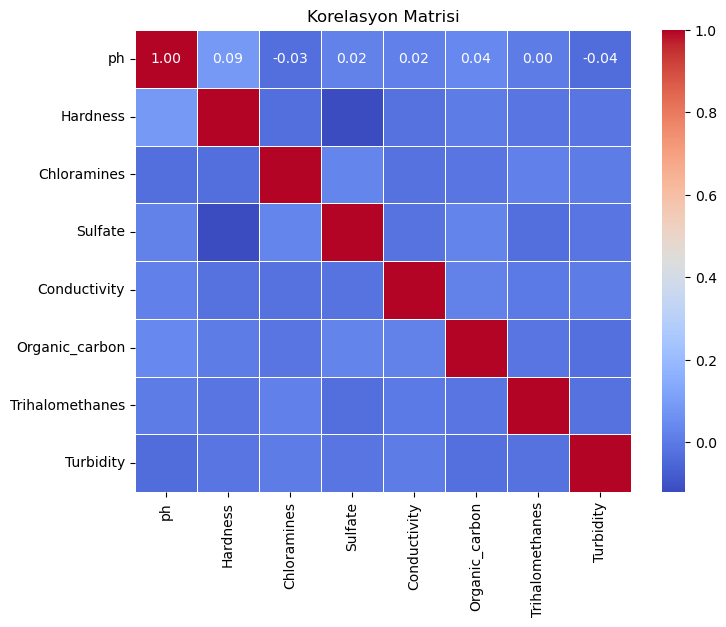

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


numerical_columns = ['ph', 'Hardness', 'Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']


corr_matrix = df[numerical_columns].corr()


print("Korelasyon Matrisi:")
print(corr_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.show()

In [30]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


numerical_columns = ['ph', 'Hardness', 'Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']

X = df[numerical_columns]


X_const = add_constant(X)


vif_data = pd.DataFrame()
vif_data["Variable"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]


print("VIF Değerleri:")
print(vif_data)

VIF Değerleri:
          Variable         VIF
0            const  271.539881
1               ph    1.012448
2         Hardness    1.024843
3      Chloramines    1.003221
4          Sulfate    1.018969
5     Conductivity    1.002417
6   Organic_carbon    1.003498
7  Trihalomethanes    1.002193
8        Turbidity    1.002842


## Mutual İnfo Regression

In [37]:
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns


X = df.drop(columns=['Potability'])  
y = df['Potability']  


mi = mutual_info_classif(X, y)


mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi
})


mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)


print(mi_df)



           Feature  Mutual Information
1         Hardness            0.026560
4          Sulfate            0.007380
5     Conductivity            0.007077
6   Organic_carbon            0.004014
0               ph            0.003343
8        Turbidity            0.003075
2           Solids            0.001066
3      Chloramines            0.000000
7  Trihalomethanes            0.000000


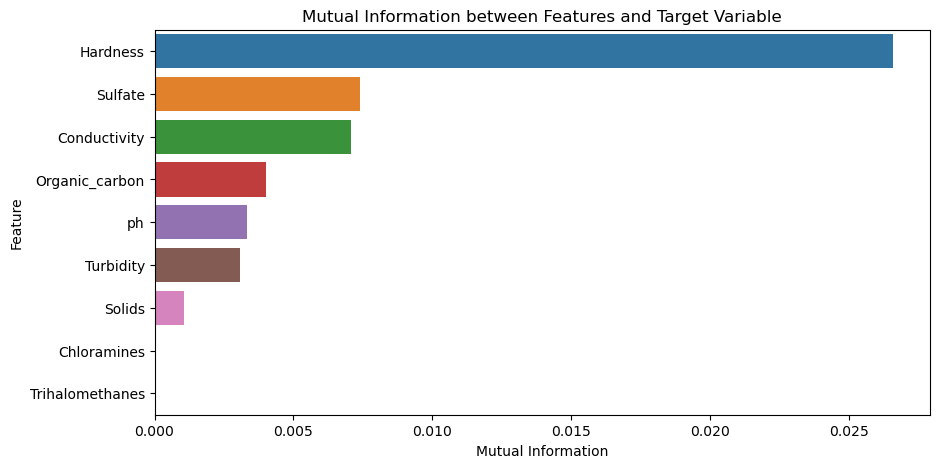

In [45]:

plt.figure(figsize=(10, 5))
sns.barplot(x='Mutual Information', y='Feature', data=mi_df)
plt.title('Mutual Information between Features and Target Variable')
plt.show()


### Normal Dağılım Testleri (Shapiro-Wilk) Sonuçları:

- Verilerin çoğu (ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Trihalomethanes) normal dağılım göstermiyor (p-değeri çok küçük).

- Ancak, Organic_carbon ve Turbidity normal dağılıma yakın görünüyor (p-değeri yüksek).

### Basıklık ve Çarpıklık Testleri:

- Çoğu değişkenin çarpıklık ve basıklık değerleri, normal dağılıma yakın veya simetrik görünüyor. Bazı veriler (Solids, Conductivity, Turbidity) daha düz ve platykurtik (basıklık düşük).

### Varyans Eşitliği Testi (Levene Testi) Sonuçları:

- Birkaç değişken (ph, Hardness, Sulfate) için varyanslar eşit değil (p-değeri çok küçük).

- Conductivity, Organic_carbon, Trihalomethanes, Turbidity için ise varyanslar eşit (p-değeri büyük).

### Mann-Whitney U Testi Sonuçları:

- Verilen tüm değişkenler (ph, Hardness, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity) ile Potability arasında anlamlı bir ilişki bulunmadı (tüm p-değerleri büyük).

### Pearson Korelasyon Testi Sonuçları:

- ph ile Hardness, ph ile Organic_carbon, ve ph ile Turbidity arasında anlamlı korelasyonlar bulunmuş. Ancak diğer değişkenlerle korelasyonlar istatistiksel olarak anlamlı değil.

### VIF (Variance Inflation Factor) Değerleri:

- Tüm değişkenlerin VIF değerleri 1'in çok üstünde değil, bu da değişkenler arasında ciddi multikollinearlik sorunları olmadığını gösteriyor. Ancak, const değişkeni çok yüksek bir VIF değerine sahip.

### Mutual Information Sonuçları:

- En yüksek mutual information değeri Hardness değişkenine ait. Diğer değişkenlerin mutual information değerleri ise çok düşük. Bu, Hardness'in hedef değişken ile daha güçlü bir ilişkiye sahip olduğunu gösteriyor.

## Genel Değerlendirme:

Testler, verinin genelde normal dağılımdan uzak olduğunu gösteriyor. Ancak, Organic_carbon ve Turbidity gibi değişkenler normal dağılıma yakın.

Mann-Whitney U Testi ile yapılan karşılaştırmalar, hedef değişken Potability ile belirli özellikler arasında anlamlı bir fark olmadığını ortaya koyuyor.

Pearson korelasyonları ise genellikle düşük ve çoğu anlamlı değil. Bununla birlikte, bazı değişkenler arasında küçük ama anlamlı ilişkiler bulundu.

VIF değerleri multikollinearlik konusunda bir sorun olmadığını işaret ederken, Mutual Information değerleri ile Hardness ve ph gibi değişkenlerin diğer değişkenlerle karşılaştırdığımızda önemli olduğu görünüyor.

Bu bulgular, modelde özellikle Hardness, Organic_carbon, ve Turbidity gibi özelliklere odaklanmamız gerektiğini gösterebilir. Verilerin normal dağılım göstermemesi, bazı testlerin güvenilirliğini etkileyebilir, ancak genel olarak, modelleme sırasında kullanılacak verilerin daha dikkatli seçilmesi gerekebilir.